# A brief intro to [mw-plot](https://pypi.org/project/mw-plot/)

From the website:
> *A handy python package to do plotting on a face-on/edge-on milkyway/skymap with matplotlib. You can set the center and radius of the plot anywhere on a milkyway galaxy image with galactic or galactocentric coordinates.*

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from mw_plot import MWPlot, MWSkyMap
import numpy as np

%matplotlib inline

In [2]:
src = SkyCoord(264.495150, -37.771764, unit=['deg','deg'], frame='icrs')

# Distances you want to sample
dist = np.arange(5.0,9.0,0.1)*u.kpc

# Source coordinates (have to be Galactic, NOT RA and Dec):
l = np.full(len(dist),src.galactic.l.deg)*u.deg
b = np.full(len(dist),src.galactic.b.deg)*u.deg

# Making the list and concerting to galactocentric coordinates:
phys_pos = SkyCoord(l, b, dist, frame='galactic')
x = -phys_pos.galactocentric.x 
y = phys_pos.galactocentric.y
z = phys_pos.galactocentric.z

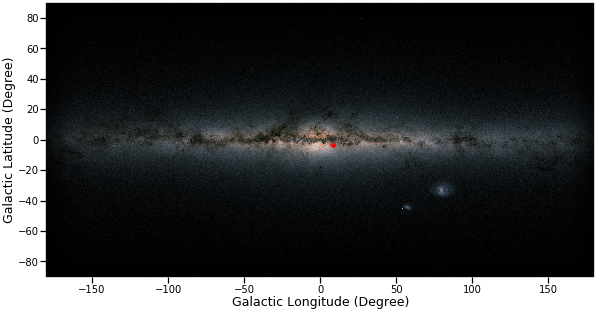

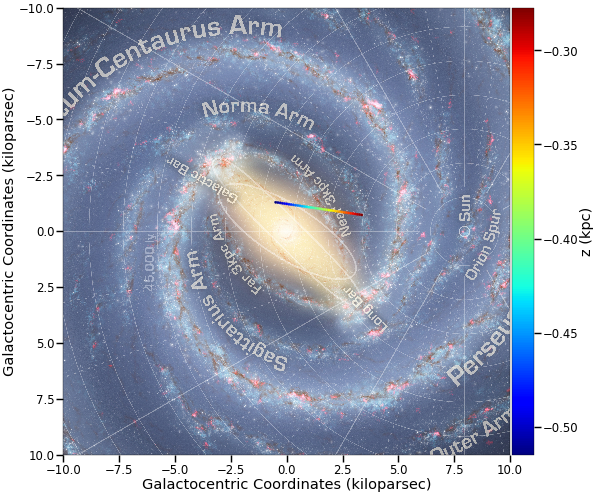

In [4]:
plot_instance = MWSkyMap(grid='galactic')
plot_instance.dpi = 30
plot_instance.s = 100
plot_instance.mw_scatter(src.ra.deg * u.deg, src.dec.deg * u.deg, 'r',)
plot_instance.savefig('mw1.jpg')

plot_instance = MWPlot(radius=10 * u.kpc, unit=u.kpc, coord='galactocentric', annotation=True)
plot_instance.dpi = 30
plot_instance.imalpha = 1.0
plot_instance.s = 30 
plot_instance.cmap = 'jet'
plot_instance.mw_scatter(x, y, [z, 'z (kpc)'])
plot_instance.savefig('mw2.jpg')